In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('kc_house_data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
#dealing with missing values
#columns waterfront, view and yr_renovated have missing values

#YR_RENOVATED
print(df.yr_renovated.unique())
print(df.yr_renovated.isna().sum())

# 17011 entries have the value of '0', which seems to be a placeholder for the fact the house has never been renovated
# there are 3842 NaNs - I will change these into 'not renovated', as that is the overwhelming value
# I will turn this column into categorical, as it a discrete variable

df.yr_renovated = df.yr_renovated.astype('str')

df.loc[df.yr_renovated == '0.0','yr_renovated'] = 'not renovated'
df.loc[df.yr_renovated == 'nan','yr_renovated'] = 'not renovated'

#df.yr_renovated = df.yr_renovated.astype('category')


[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
3842


In [4]:
#VIEW
# this columns has 63 NaNs
# the overwhelming value in this column is 0 (19 422 out of 21 597)
# I will turn the missing values into '0'
df.view.value_counts()

df.view = df.view.fillna(0.0)

In [5]:
#WATERFRONT
# overwhelming value: 0.0 (19075)
# NaNs = 2376
#For the sake of simplicty, I will drop this columns entirely as it will not provide much insight.
df = df.drop('waterfront',axis=1)

#While on it, I will also delete the date column, as we will not need that data
df = df.drop('date',axis=1)
#Now we have no obviuous missing values!
df.isna().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#CHECKING COLUMN TYPES 

df.info()
df.condition.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(2)
memory usage: 3.1+ MB


array([3, 5, 4, 1, 2], dtype=int64)

In [7]:
# I will turn column zipcode into strings(objects) as they are categorical variables

df.zipcode = df.zipcode.astype('str')

#I will turn View into integer
df.view = df.view.astype('int64')

#sqft_basement
# There are 454 '?' values in this dataset. That is a relatively small amount.
#I will first replace '?' with Nan
df.sqft_basement = df.sqft_basement.replace('?',np.nan)


#Now I will turn the columns into float and then replace the missing value with the median - which is 0!
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement = df.sqft_basement.fillna(df.sqft_basement.median())

#All column types seem to be good now

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(2)
memory usage: 3.1+ MB


In [8]:
#CHECKING FOR PLACEHOLDERS AND WRONG VALUES

In [9]:
list_of_columns = list(df.columns)
print(list_of_columns)
#df.sqft_lot15.value_counts()
#checking for placeholders in individual columns
#so far, not columns seem to have any placeholders anymore
#I will later use scatter plots to check for unusual values

['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


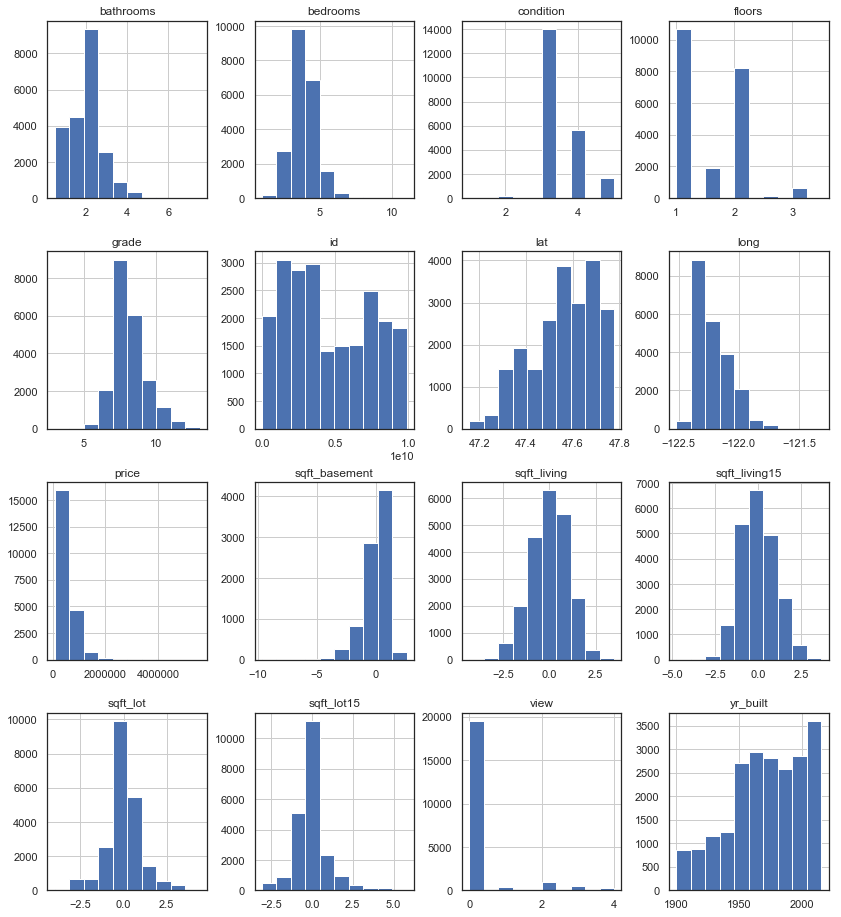

In [59]:
#QUICK VISUALISATIONS
df.hist(figsize=(14,16));


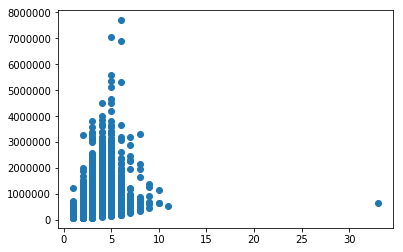

In [11]:
# after a quick look at different scatterplots, I have identified some outliers
plt.scatter(df.bedrooms,df.price)
plt.show()

In [12]:
#looking for outliers
df.describe()
#there is a house with 33 bedrooms
#let's have a look at it
df.loc[df.bedrooms > 15] 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1040,580.0,1947,not renovated,98103,47.6878,-122.331,1330,4700


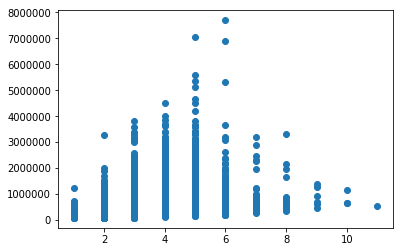

In [17]:
plt.scatter(df.bedrooms,df.price)

In [36]:
#I will remove this house from the dataset
df = df.drop([15856])

KeyError: '[15856] not found in axis'

In [37]:
#also, there are 3 houses sold for more than $6 000 000
#let's have a look at them
df.loc[df.price > 6000000]
#as we can see, there are only two houses in that category, which are skewing our dataset
#median price: $450 000
#mean price: $540 296

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [38]:
#I will drop these houses from the dataset
df = df.drop([3910])
df = df.drop([7245])
df = df.drop([9245])

KeyError: '[3910] not found in axis'

In [39]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.159200e+04,2.159200e+04,21592.000000,21592.000000,21592.000000,2.159200e+04,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000
mean,4.580173e+09,5.392838e+05,3.371341,2.114927,2078.620369,1.508391e+04,1.493956,0.232632,3.409781,7.657095,1787.364116,285.246434,1971.002362,47.560071,-122.213981,1986.219387,12747.368007
std,2.876509e+09,3.586623e+05,0.903438,0.765850,909.206382,4.136896e+04,0.539572,0.763573,0.650501,1.171606,822.540977,438.292204,29.373163,0.138560,0.140727,684.540761,27240.912818
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471075,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.067975e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,47.678000,-122.125000,2360.000000,10080.000000
max,9.900000e+09,5.570000e+06,11.000000,7.500000,9640.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [40]:
#Outliers in sqft_living
df.loc[df.sqft_living > 10000]
#There are only 3 properties with sgft_living value above 10000
#The value of the property is $2,280,000
#I will remove this property from the dataset
df = df.drop([12764])

KeyError: '[12764] not found in axis'

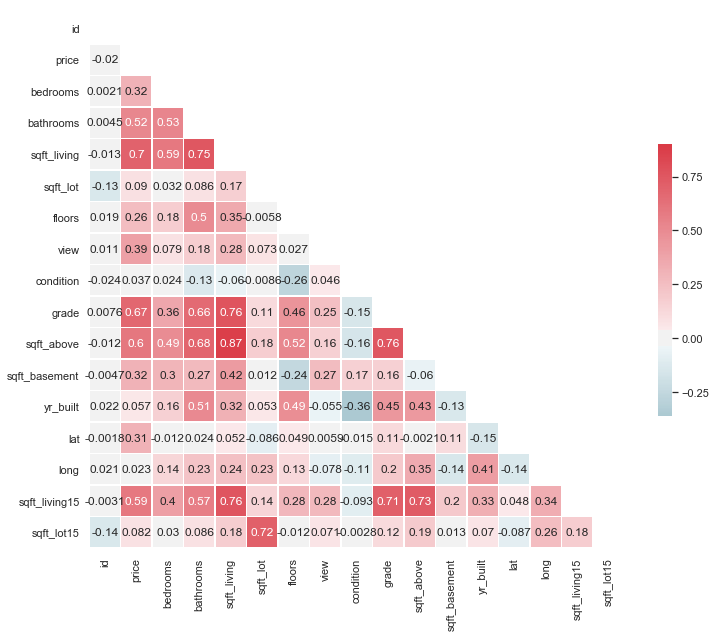

In [41]:
# checking for MULTICOLLINEARITY

# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5})

In [42]:
# columns 'sqft_living' and 'sqft_above' have correlation of 0.87
# I will therefore drop the 'sqft_above' column
df = df.drop('sqft_above',axis=1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 18 columns):
id               21592 non-null int64
price            21592 non-null float64
bedrooms         21592 non-null int64
bathrooms        21592 non-null float64
sqft_living      21592 non-null int64
sqft_lot         21592 non-null int64
floors           21592 non-null float64
view             21592 non-null int64
condition        21592 non-null int64
grade            21592 non-null int64
sqft_basement    21592 non-null float64
yr_built         21592 non-null int64
yr_renovated     21592 non-null object
zipcode          21592 non-null object
lat              21592 non-null float64
long             21592 non-null float64
sqft_living15    21592 non-null int64
sqft_lot15       21592 non-null int64
dtypes: float64(6), int64(10), object(2)
memory usage: 3.8+ MB


C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


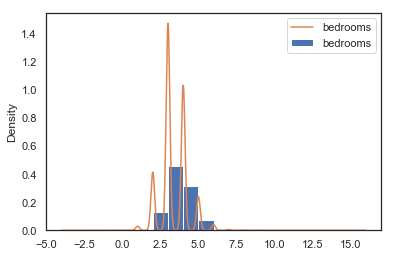

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


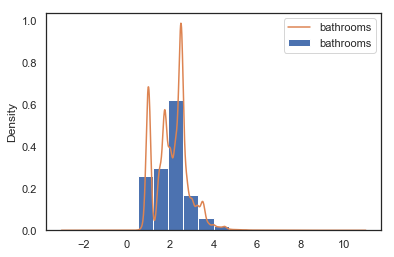

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


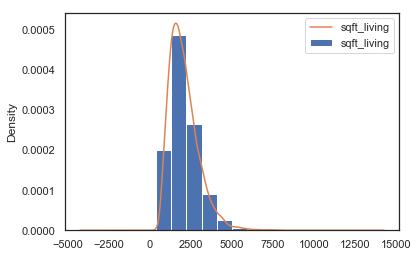

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


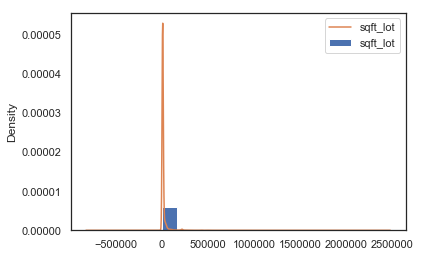

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


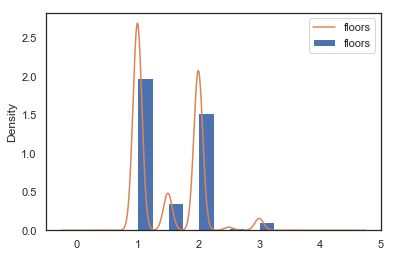

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


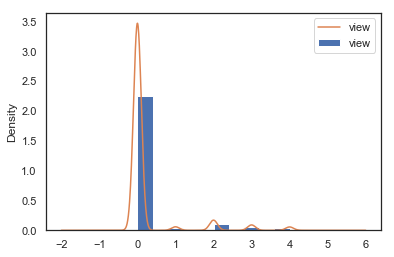

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


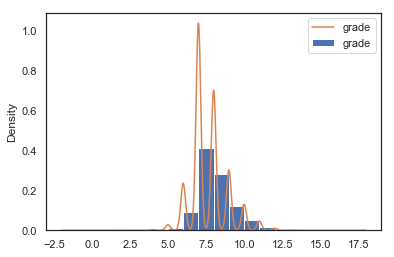

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


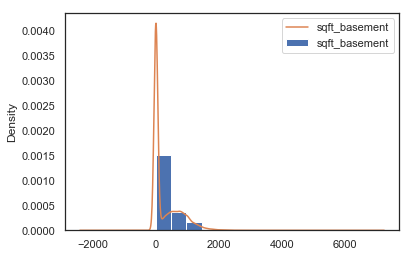

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


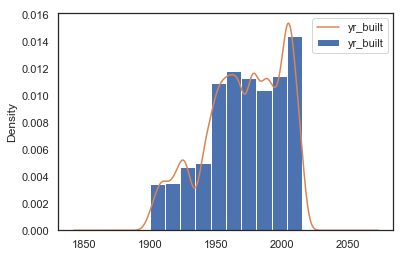

TypeError: Empty 'DataFrame': no numeric data to plot

In [44]:
#TRANSFORMING DATA - LOG TRANSFORMATION
#let's have a look at distribution of our data to see which columns need log transormation

for column in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'grade', 'sqft_basement', 'yr_built','yr_renovated', 'lat', 'long', 'sqft_living15','sqft_lot15']:
    df[column].plot.hist(normed=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()
    
#columns that might need log transformation to improve distribution and skewness:
    #sqft_living
    #sqft_lot
    #floor - SHOULD THIS BE CATEGORICAL?
    #view
    #grade (heavy skew)
    #sqft_basement
    #yr_built


In [56]:
#Log transforming data
#df.sqft_living = np.log(df.sqft_living)
#all numerical columns: sqft_living,sqft_lot,sqft_basement, sqft_living15, sqft_lot15
df.sqft_lot = np.log(df.sqft_lot)
df.sqft_basement = np.log(df.sqft_basement)
df.sqft_living15 = np.log(df.sqft_living15)
df.sqft_lot15 = np.log(df.sqft_lot15)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [48]:
df.sqft_living.describe()

count    21592.000000
mean         7.550398
std          0.423542
min          5.913503
25%          7.265430
50%          7.554859
75%          7.843849
max          9.173676
Name: sqft_living, dtype: float64

In [46]:
df.sqft_living.describe()

count    21592.000000
mean      2078.620369
std        909.206382
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max       9640.000000
Name: sqft_living, dtype: float64

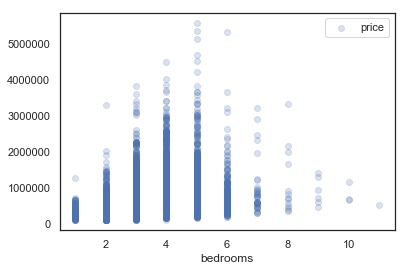

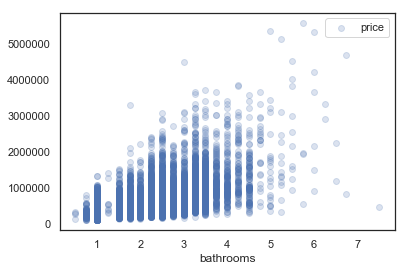

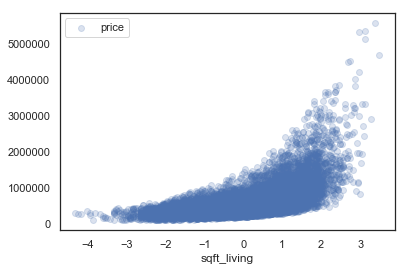

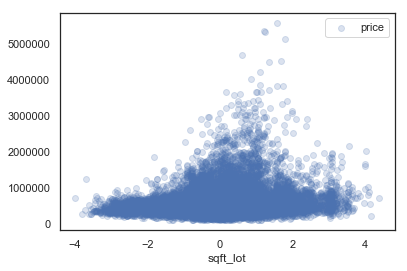

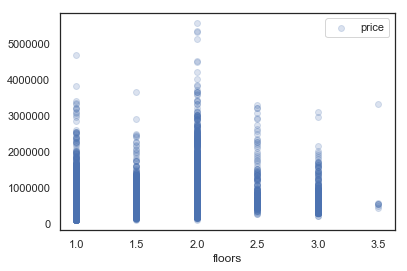

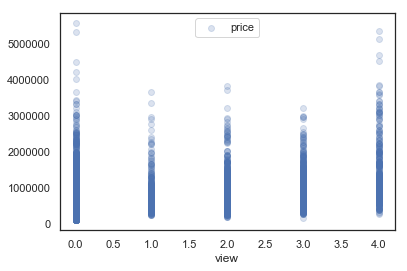

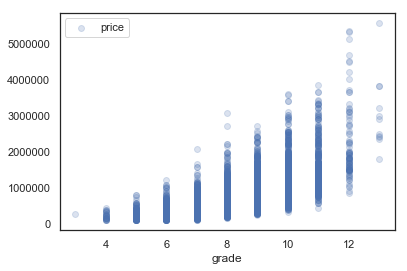

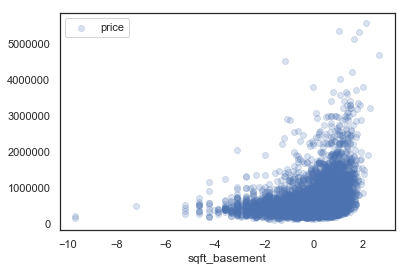

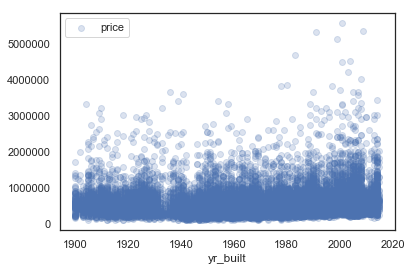

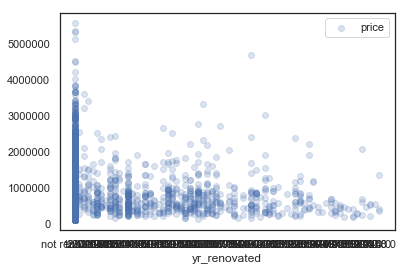

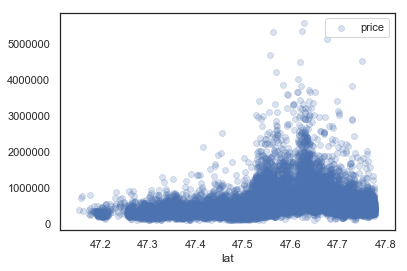

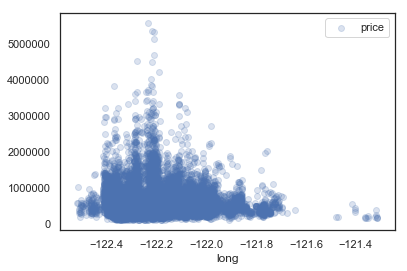

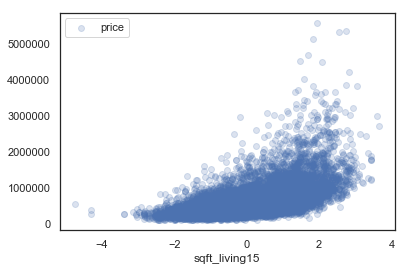

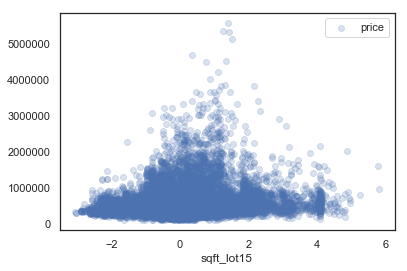

In [58]:
#CHECKING FOR LINEARITY
for column in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'grade', 'sqft_basement', 'yr_built','yr_renovated', 'lat', 'long', 'sqft_living15','sqft_lot15']:
    plt.scatter(df[column],df.price,alpha=0.2)
    plt.xlabel(column)
    plt.legend()
    plt.show()

In [57]:
#Standardisation/Normalisation
#all numerical columns: sqft_living,sqft_lot,sqft_basement, sqft_living15, sqft_lot15
#df.sqft_living = (df.sqft_living - df.sqft_living.mean()) / df.sqft_living.std()
df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()
df.sqft_basement = (df.sqft_basement - df.sqft_basement.mean()) / df.sqft_basement.std()
df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()
df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()



In [52]:
df.sqft_living.describe()

count    21592.000000
mean         2.020017
std          0.056371
min          1.777238
25%          1.983127
50%          2.022191
75%          2.059730
max          2.216338
Name: sqft_living, dtype: float64

In [54]:
df.sqft_living.describe()

count    2.159200e+04
mean     9.878233e-13
std      1.000000e+00
min     -4.306845e+00
25%     -6.544208e-01
50%      3.855518e-02
75%      7.044837e-01
max      3.482682e+00
Name: sqft_living, dtype: float64